## Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import scipy.stats as stats
from scipy.stats import linregress

* Read cleaned vaccination data

In [2]:
# read cleaned us vax info
clean_vax_df= pd.read_csv ('../data/4CLEAN_covid19_vaccinations_in_us.csv')
clean_vax_df.head(52)

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,Residents 12+ with a completed primary series,Residents 5+ with at least one dose,Residents 5+ with a completed primary series
0,Alaska,2176065,1328221,535718,73.2,418608,90909,81999,504958,452885,530318,474707
1,Alabama,12349530,7018011,3193141,65.1,2416344,840073,725159,3107922,2554026,3183544,2607644
2,Arkansas,8373210,4874091,2115165,70.1,1547724,524198,440981,2031772,1661645,2104099,1715538
3,Arizona,19959120,14647405,5704677,78.4,4239941,1348446,1188267,5394242,4596164,5663049,4805903
4,California,121107865,88487852,33613401,85.1,25681179,6058090,5441414,31630858,27956563,33267856,29371810
5,Colorado,17769135,13033446,4837792,84.0,3729317,902546,818078,4549073,4023663,4776300,4215139
6,Connecticut,11881825,9040989,3670090,95.0,2602449,823664,654355,3481915,2816633,3640198,2948721
7,Delaware,3352025,2169125,861811,88.5,641112,225182,193640,823076,686257,856096,713143
8,Florida,61526685,42267369,17810446,82.9,13732833,4944364,4244393,17285242,14571195,17757764,14946304
9,Georgia,28727475,17124791,7287758,68.6,5494615,1494072,1315992,6998957,5894565,7248684,6085428


* Rename column to prepare for merging

In [3]:
clean_vax_df = clean_vax_df.rename(columns={"Jurisdiction (State/Territory) or Federal Entity": "State"})
clean_vax_df.head(50)

,State,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,Residents 12+ with a completed primary series,Residents 5+ with at least one dose,Residents 5+ with a completed primary series
0,Alaska,2176065,1328221,535718,73.2,418608,90909,81999,504958,452885,530318,474707
1,Alabama,12349530,7018011,3193141,65.1,2416344,840073,725159,3107922,2554026,3183544,2607644
2,Arkansas,8373210,4874091,2115165,70.1,1547724,524198,440981,2031772,1661645,2104099,1715538
3,Arizona,19959120,14647405,5704677,78.4,4239941,1348446,1188267,5394242,4596164,5663049,4805903
4,California,121107865,88487852,33613401,85.1,25681179,6058090,5441414,31630858,27956563,33267856,29371810
5,Colorado,17769135,13033446,4837792,84.0,3729317,902546,818078,4549073,4023663,4776300,4215139
6,Connecticut,11881825,9040989,3670090,95.0,2602449,823664,654355,3481915,2816633,3640198,2948721
7,Delaware,3352025,2169125,861811,88.5,641112,225182,193640,823076,686257,856096,713143
8,Florida,61526685,42267369,17810446,82.9,13732833,4944364,4244393,17285242,14571195,17757764,14946304
9,Georgia,28727475,17124791,7287758,68.6,5494615,1494072,1315992,6998957,5894565,7248684,6085428


* Read cleaned US population data

In [4]:
# read cleaned us pop
clean_st_pop_df= pd.read_csv ('../data/CLEAN_regionpopulation.csv')
clean_st_pop_df.head(50)

,State,2022 Population Estimate,Region
0,Connecticut,3626205,Northeast
1,Maine,1385340,Northeast
2,Massachusetts,6981974,Northeast
3,New Hampshire,1395231,Northeast
4,New Jersey,9261699,Northeast
5,New York,19677151,Northeast
6,Pennsylvania,12972008,Northeast
7,Rhode Island,1093734,Northeast
8,Vermont,647064,Northeast
9,Illinois,12582032,Midwest


* Read cleaned COVID-19 deaths data

In [5]:
# read cleaned covid deaths
clean_cov_death_df= pd.read_csv ('../data/CLEAN_FINAL2_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
clean_cov_death_df.head(50)

,Data As Of,State,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,09/27/2023,Alabama,01/01/2020,09/23/2023,All Sexes,All Ages,21520.0,231602.0,7411.0
1,09/27/2023,Alaska,01/01/2020,09/23/2023,All Sexes,All Ages,1492.0,20039.0,813.0
2,09/27/2023,Arizona,01/01/2020,09/23/2023,All Sexes,All Ages,30307.0,284393.0,17435.0
3,09/27/2023,Arkansas,01/01/2020,09/23/2023,All Sexes,All Ages,12663.0,140174.0,6060.0
4,09/27/2023,California,01/01/2020,09/23/2023,All Sexes,All Ages,109248.0,1178346.0,62152.0
5,09/27/2023,Colorado,01/01/2020,09/23/2023,All Sexes,All Ages,15378.0,176094.0,7850.0
6,09/27/2023,Connecticut,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
7,09/27/2023,Delaware,01/01/2020,09/23/2023,All Sexes,All Ages,3445.0,41037.0,1683.0
8,09/27/2023,Florida,01/01/2020,09/23/2023,All Sexes,All Ages,81894.0,915140.0,50161.0
9,09/27/2023,Georgia,01/01/2020,09/23/2023,All Sexes,All Ages,36499.0,384074.0,18689.0


* Merge US population data with vaccination data

In [6]:
merge_vax_pop_df = pd.merge(clean_st_pop_df, clean_vax_df, on="State")
merge_vax_pop_df.head()

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,Residents 12+ with a completed primary series,Residents 5+ with at least one dose,Residents 5+ with a completed primary series
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,3481915,2816633,3640198,2948721
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,1252248,1070587,1303033,1116192
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,6947787,5480791,7306432,5770765
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,1152503,946332,1194903,977652
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,8011957,6701732,8374653,7008596


* Merge Population/Vaccination data with COVID-19 data

In [7]:

# merge with deaths csv
merge_all_df = pd.merge(merge_vax_pop_df, clean_cov_death_df, on = "State")
merge_all_df.head(50)

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
5,New York,19677151,Northeast,61302975,45177512,18427712,94.7,14013838,3630599,3195894,...,18297040,15686124,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,80440.0,667846.0,31870.0
6,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
7,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
8,Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0
9,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0


In [8]:
# merge_all_df["Region"].unique()

* Write merged data to csv file

In [9]:
merge_all_df.to_csv("../data/CLEAN_merged_all.csv", index = False)

In [10]:
merge_all_df.set_index("State")

,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
State,,,,,,,,,,,,,,,,,,,,,
Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,3481915,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,1252248,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,6947787,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,1152503,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,8011957,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
New York,19677151,Northeast,61302975,45177512,18427712,94.7,14013838,3630599,3195894,17549952,...,18297040,15686124,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,80440.0,667846.0,31870.0
Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,11109272,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,1065257,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,582633,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0


* attemps to analysize data, dividing states into regions

In [11]:
#'Northeast', 'Midwest', 'South', 'West' dfs 
northeast_df = merge_all_df[merge_all_df['Region'] == 'Northeast']
midwest_df = merge_all_df[merge_all_df['Region'] == 'Midwest']
south_df = merge_all_df[merge_all_df['Region'] == 'South']
west_df = merge_all_df[merge_all_df['Region'] == 'West']

In [12]:
northeast_df.head(50)

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
5,New York,19677151,Northeast,61302975,45177512,18427712,94.7,14013838,3630599,3195894,...,18297040,15686124,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,80440.0,667846.0,31870.0
6,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
7,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
8,Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0


* scatter plot/linear regression of NorthEast dataframe: Residents with at least one dose vs. COVID-19 Deaths

The r-squared is: 0.9834465228754805


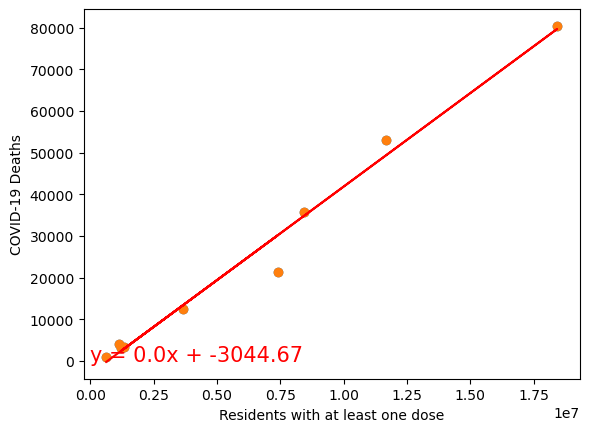

In [13]:
x_values = northeast_df['Residents with at least one dose']
y_values = northeast_df['COVID-19 Deaths']
plt.scatter(x_values,y_values)
plt.xlabel('Residents with at least one dose')
plt.ylabel('COVID-19 Deaths')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.2,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

* scatter plot/linear regression of NorthEast dataframe: COVID-19 Deaths vs. Residents 65+ with a completed primary series

The r-squared is: 0.9849839643946968


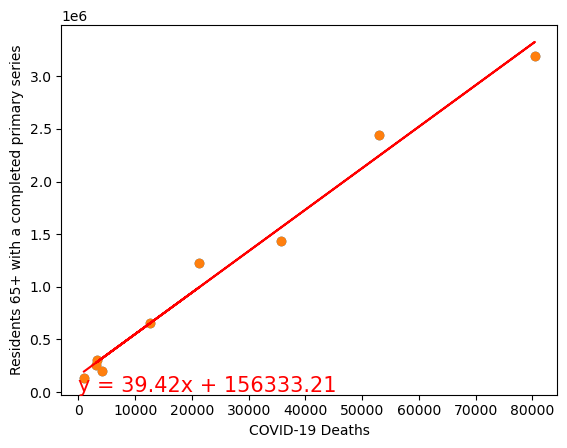

In [14]:
x_values = northeast_df['COVID-19 Deaths']
y_values = northeast_df['Residents 65+ with a completed primary series']
plt.scatter(x_values,y_values)
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Residents 65+ with a completed primary series')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.2,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

* Bar chart of NorthEast dataframe: 'Total doses distributed', 'Total doses administered by jurisdiction', 'COVID-19 Deaths'

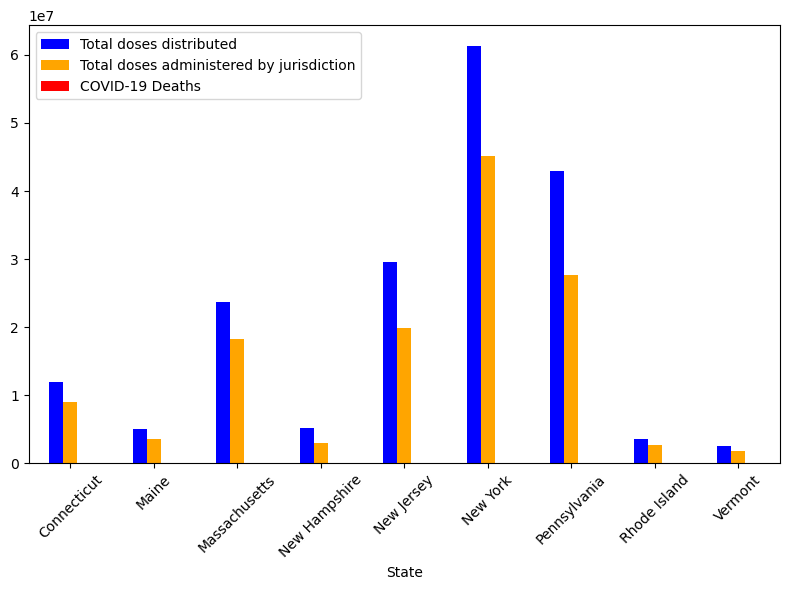

In [15]:
northeast_df.plot(kind='bar', figsize=(8,6), x='State', y=['Total doses distributed', 'Total doses administered by jurisdiction', 'COVID-19 Deaths'],
                   rot=45, color=['blue', 'orange', 'red'])
plt.tight_layout()

In [16]:
# sum_stats_NE = northeast_df["2022 Population Estimate"]
# sum_stats_NE.describe()


* Bar chart of Midwest dataframe: 'Total doses distributed', 'Total doses administered by jurisdiction', 'COVID-19 Deaths'

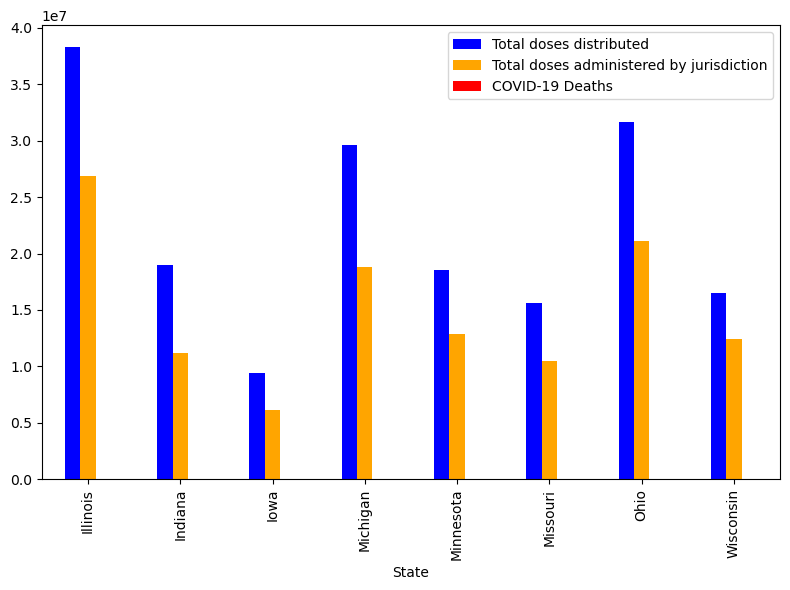

In [17]:
midwest_df.plot(kind='bar', figsize=(8,6), x='State', y=['Total doses distributed', 'Total doses administered by jurisdiction', 'COVID-19 Deaths'], 
                rot=90, color=['blue', 'orange', 'red'])
plt.tight_layout()

* Bar chart of West dataframe: 'Total doses distributed', 'Total doses administered by jurisdiction', 'COVID-19 Deaths'

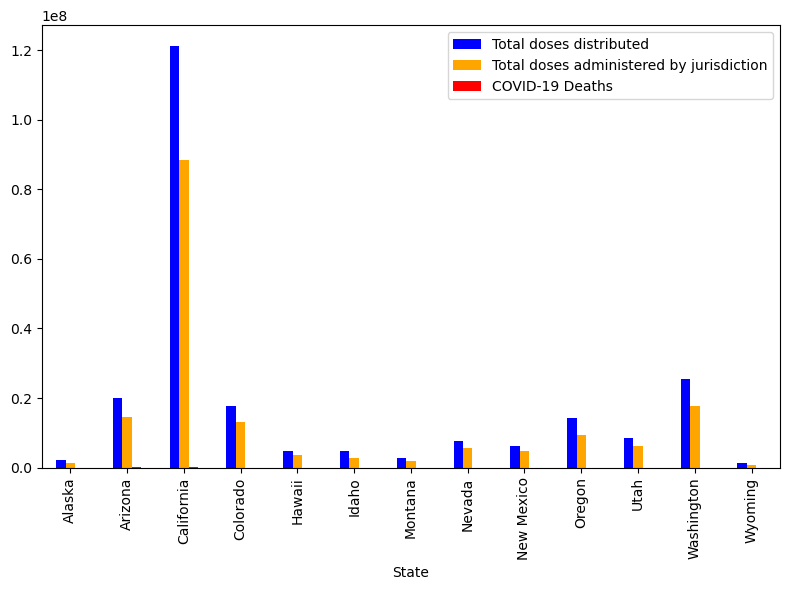

In [18]:
west_df.plot(kind='bar', figsize=(8,6), x='State', y=['Total doses distributed', 'Total doses administered by jurisdiction', 'COVID-19 Deaths'], 
             rot=90, color=['blue', 'orange', 'red'])
plt.tight_layout()

* Bar chart of South dataframe: 'Total doses distributed', 'Total doses administered by jurisdiction', 'COVID-19 Deaths'

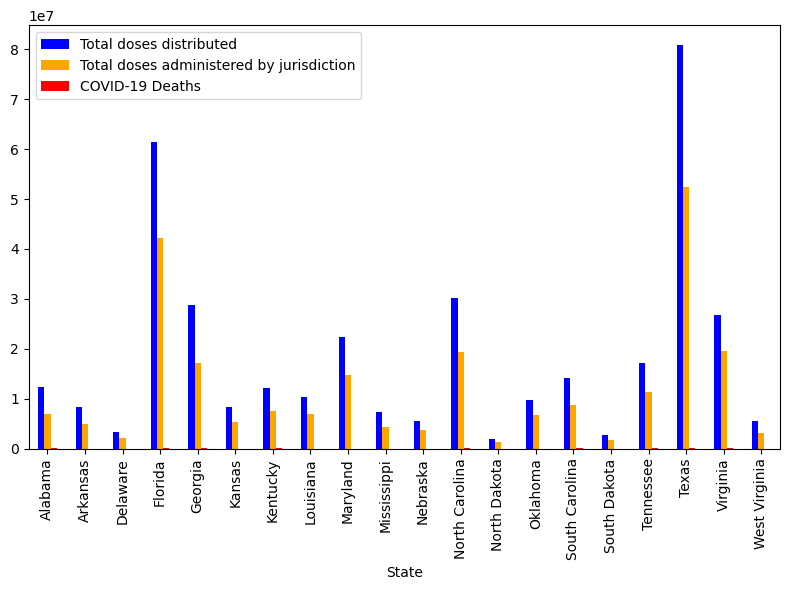

In [19]:
south_df.plot(kind='bar', figsize=(8,6), x='State', y=['Total doses distributed', 'Total doses administered by jurisdiction', 'COVID-19 Deaths'], 
              rot=90, color=['blue', 'orange', 'red'])
plt.tight_layout()

* Bar chart of ALL states dataframe: 'Total doses distributed', 'Total doses administered by jurisdiction''

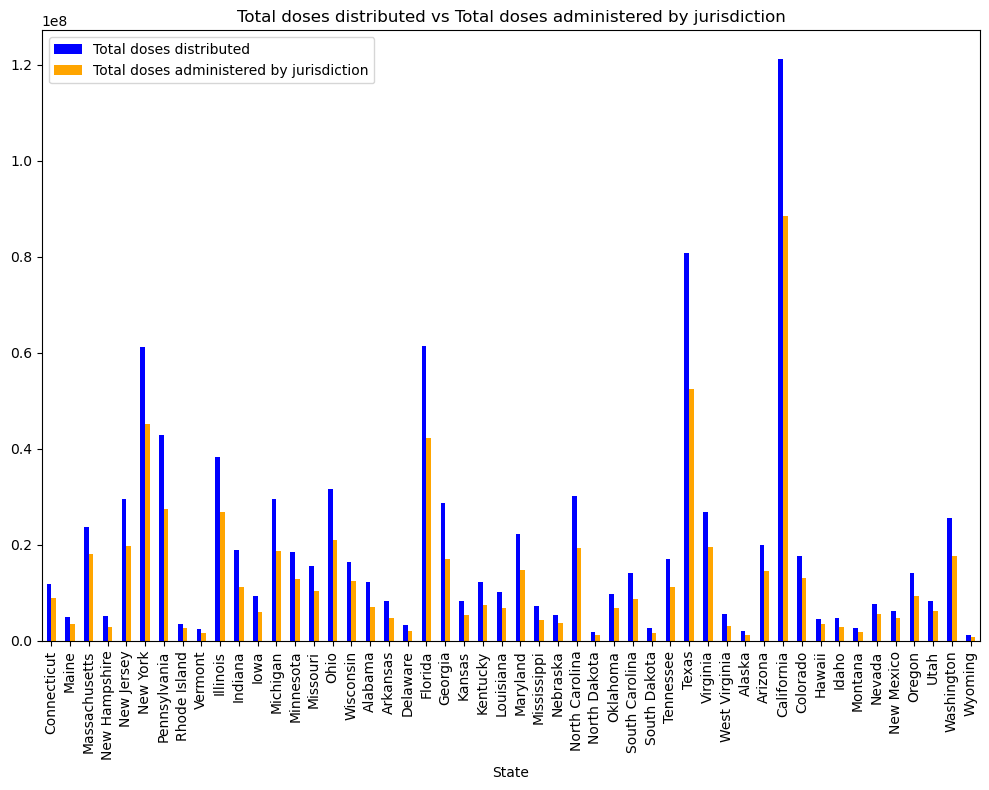

In [20]:
ax = merge_all_df.plot(kind='bar', figsize=(10,8), x='State', y=['Total doses distributed', 'Total doses administered by jurisdiction'], 
                       rot=90, color=['blue', 'orange'])
plt.title("Total doses distributed vs Total doses administered by jurisdiction")
plt.tight_layout()

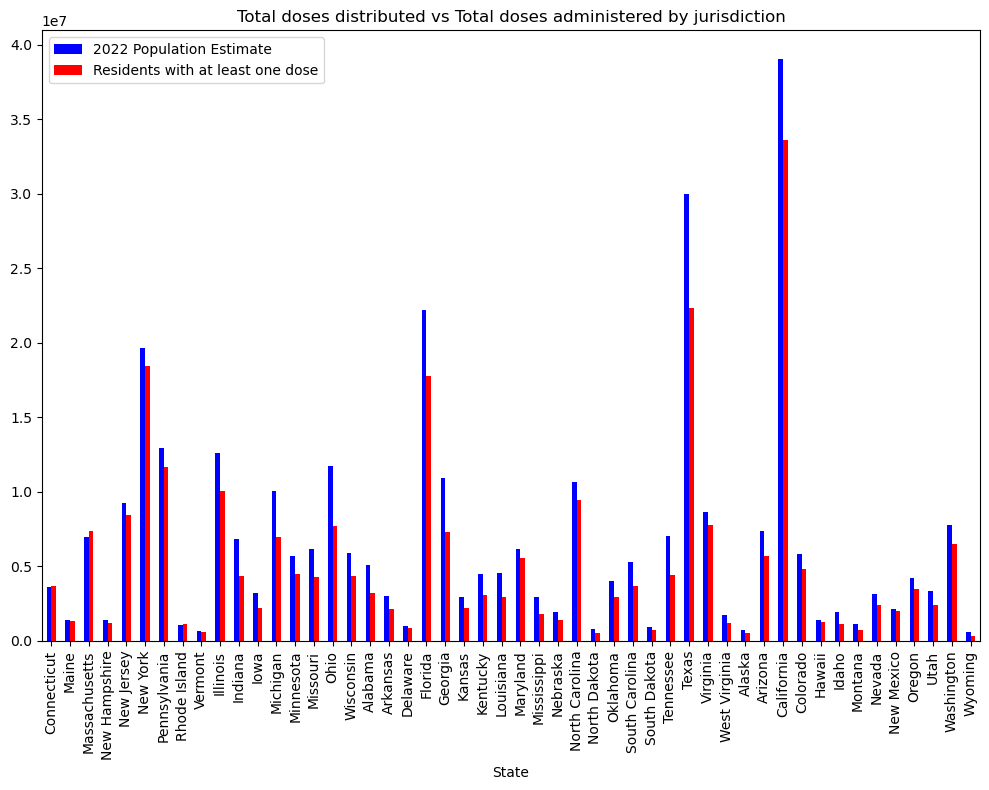

In [21]:
ax = merge_all_df.plot(kind='bar', figsize=(10,8), x='State', y=['2022 Population Estimate','Residents with at least one dose'], 
                                                                rot=90, color=['blue','red'])
plt.title("Total doses distributed vs Total doses administered by jurisdiction")
plt.tight_layout()

* 3 states have administered at least one more than the entire population
* In Dec. 2021, the CDC capped vaccination estimates to 95% to account for accuracy differences in vaccination coverage estimates between jurisdictions.
* https://usafacts.org/visualizations/covid-vaccine-tracker-states/state/connecticut/

In [22]:
dose = merge_all_df.loc[merge_all_df['2022 Population Estimate'] <= merge_all_df['Residents with at least one dose']]
dose

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
7,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0


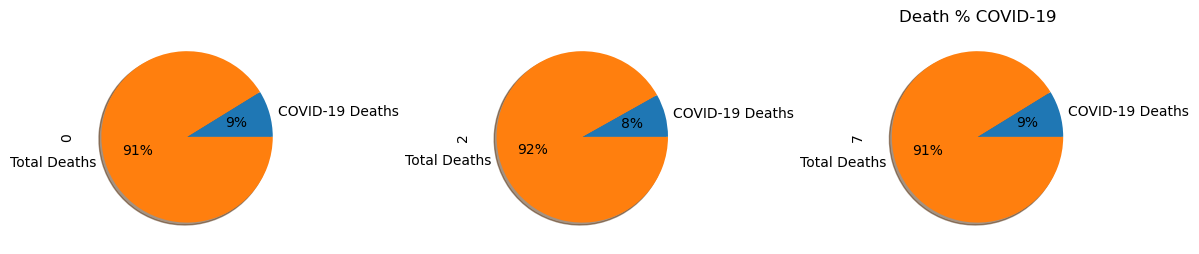

In [23]:
dose = dose[["COVID-19 Deaths", "Total Deaths"]]
dose.head()
dose.T.plot.pie(subplots=True, figsize=(12, 6), rot = 90, autopct='%1.0f%%', shadow=True, legend=False, )
plt.title("Death % COVID-19")
plt.tight_layout()


* Population per Region

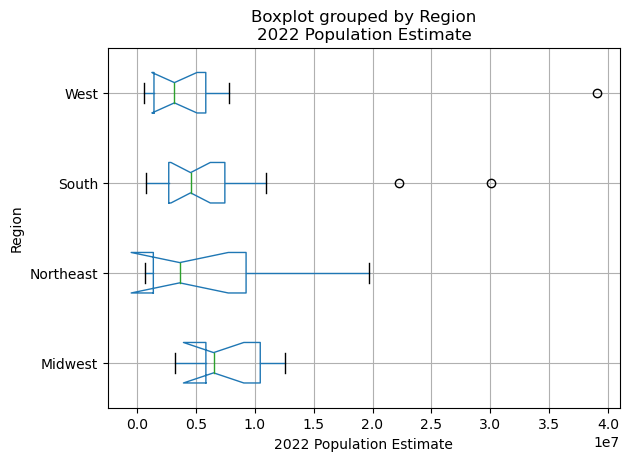

In [24]:
merge_all_df.boxplot(column='2022 Population Estimate', by='Region', notch=True, vert=False)
# plt.title('2022 Population by Region')
plt.xlabel('2022 Population Estimate')
plt.ylabel('Region')
plt.show() 

#### Determine quartiles of all states

In [25]:
# Population - All states quartile calculations - 4 outliers (NY/CA/FL/TX)
all_pop = merge_all_df["2022 Population Estimate"] 
quartiles = all_pop.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of All states is: {lowerq}")
print(f"The upper quartile of All states is: {upperq}")
print(f"The interquartile range of All states is: {iqr}")
print(f"The the median of All states is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliers = all_pop[(all_pop>upper_bound) | (all_pop<lower_bound)]

if len(outliers) > 0:
    print(f"All states's potential outliers:{outliers}")

The lower quartile of All states is: 1946255.5
The upper quartile of All states is: 7679138.75
The interquartile range of All states is: 5732883.25
The the median of All states is: 4551275.5 
Values below -6653069.375 could be outliers.
Values above 16278463.625 could be outliers.
All states's potential outliers:5     19677151
20    22244823
34    30029572
39    39029342
Name: 2022 Population Estimate, dtype: int64


* Histogram of all states

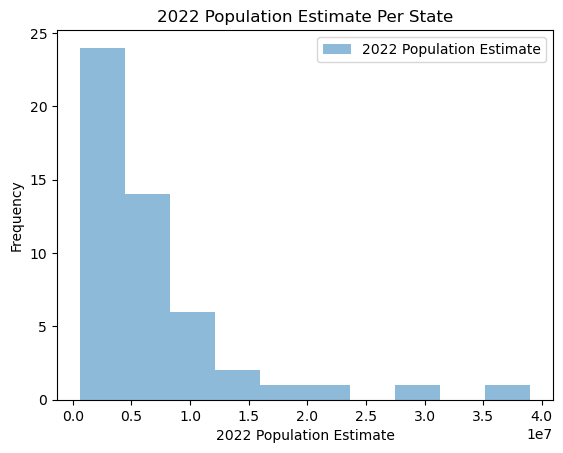

In [93]:
merge_all_df['2022 Population Estimate'].plot(kind='hist', bins = 10, alpha=0.5, legend=True)
plt.title('2022 Population Estimate Per State')
plt.xlabel('2022 Population Estimate')
# plt.ylabel('2022 Population Estimate')
plt.show()

In [27]:
merge_all_df.shape

(50, 22)

In [112]:
total_pop = merge_all_df["2022 Population Estimate"].sum()
total_pop

332615754

In [98]:
#All states
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(merge_all_df["2022 Population Estimate"],ddof = 0) # dof degrees of freedom
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(merge_all_df["2022 Population Estimate"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 54407169506007.56
The population standard deviation using the NumPy module is 7376121.576140646


* Remove outliers (NY/CA/TX/FL)

In [28]:
# remove outliers (NY/CA/TX/FL) new df
ROL_to_all_df = merge_all_df.drop([5,20,34,39], axis=0)
ROL_to_all_df.head(50)
# ROL_to_all_df.set_index("State")


,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
6,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
7,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
8,Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0
9,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0
10,Indiana,6833037,Midwest,18989660,11201087,4350210,64.6,3511518,1046568,976073,...,4321434,3886503,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,26885.0,282262.0,13954.0


In [29]:
ROL_to_all_df.shape

(46, 22)

* Histogram of remaining states

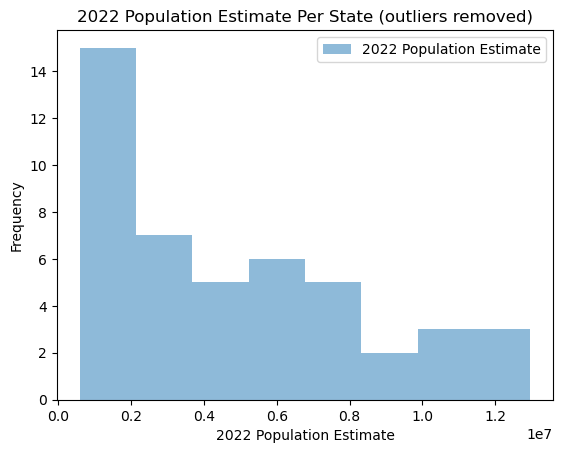

In [94]:
# removed outliers histogram
ROL_to_all_df['2022 Population Estimate'].plot(kind='hist', bins=8, alpha=0.5, legend=True)
plt.title('2022 Population Estimate Per State (outliers removed)')
plt.xlabel('2022 Population Estimate')
# plt.ylabel('2022 Population Estimate')
plt.show()

In [99]:
#All states - outliers removed
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(ROL_to_all_df["2022 Population Estimate"],ddof = 0) # dof degrees of freedom
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(ROL_to_all_df["2022 Population Estimate"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 12131875053153.146
The population standard deviation using the NumPy module is 3483084.1294968957


#### Quartiles for states - outliers removed (NY/CA/TX/FL)

In [31]:
# Population - removed outliers states quartile calculations NO outliers (no -> NY/CA/FL/TX)
ROL_pop = ROL_to_all_df["2022 Population Estimate"] 
quartiles = ROL_pop.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ROL All states is: {lowerq}")
print(f"The upper quartile of ROL All states is: {upperq}")
print(f"The interquartile range of ROL All states is: {iqr}")
print(f"The the median of ROL All states is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliers = ROL_pop[(ROL_pop>upper_bound) | (ROL_pop<lower_bound)]

if len(outliers) > 0:
    print(f"ROL All states's potential outliers:{outliers}")

The lower quartile of ROL All states is: 1816125.25
The upper quartile of ROL All states is: 6944739.75
The interquartile range of ROL All states is: 5128614.5
The the median of ROL All states is: 4129968.5 
Values below -5876796.5 could be outliers.
Values above 14637661.5 could be outliers.


In [32]:
#above rest states quartile ranges (no large states)

# The lower quartile of ROL All states is: 1816125.25
# The upper quartile of ROL All states is: 6944739.75
# The interquartile range of ROL All states is: 5128614.5
# The the median of ROL All states is: 4129968.5 
# (REMOVED OUTLIERS - All states's potential outliers:
# 5 - NY -   19677151
# 20 - FL - 22244823
# 34 - TX  - 30029572
# 39 - CA -   39029342)


In [33]:
# ROL_to_all_df.describe()
ROL_median = np.median(ROL_pop)
ROL_median

4129968.5

* Outlier states dataframe - XL states (NY/CA/TX/FL)

In [34]:
# Outliers states
XL_state_rows = merge_all_df.loc[merge_all_df["2022 Population Estimate"] >= 19677151]
XL_state_rows

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
5,New York,19677151,Northeast,61302975,45177512,18427712,94.7,14013838,3630599,3195894,...,18297040,15686124,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,80440.0,667846.0,31870.0
20,Florida,22244823,South,61526685,42267369,17810446,82.9,13732833,4944364,4244393,...,17757764,14946304,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,81894.0,915140.0,50161.0
34,Texas,30029572,South,80813315,52510128,22322586,77.0,16008968,3756924,3330121,...,22160914,18363854,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,104421.0,931558.0,58265.0
39,California,39029342,West,121107865,88487852,33613401,85.1,25681179,6058090,5441414,...,33267856,29371810,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,109248.0,1178346.0,62152.0


In [97]:
#xl states
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(XL_state_rows["2022 Population Estimate"],ddof = 0) # dof degrees of freedom
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(XL_state_rows["2022 Population Estimate"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 56974444479285.5
The population standard deviation using the NumPy module is 7548141.78982387


* write XL state csv file

In [35]:
XL_state_rows.to_csv("../data/XL_state_rows.csv", index = False)

* Histogram of Outlier states (NY/CA/TX/FL)

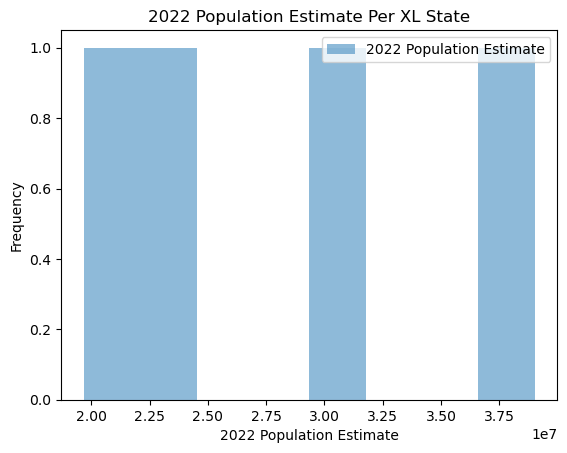

In [95]:
#Outlier states histogram
XL_state_rows['2022 Population Estimate'].plot(kind='hist', bins = 8, alpha=0.5, legend=True)
plt.title('2022 Population Estimate Per XL State')
plt.xlabel('2022 Population Estimate')
# plt.ylabel('2022 Population Estimate')
plt.show()

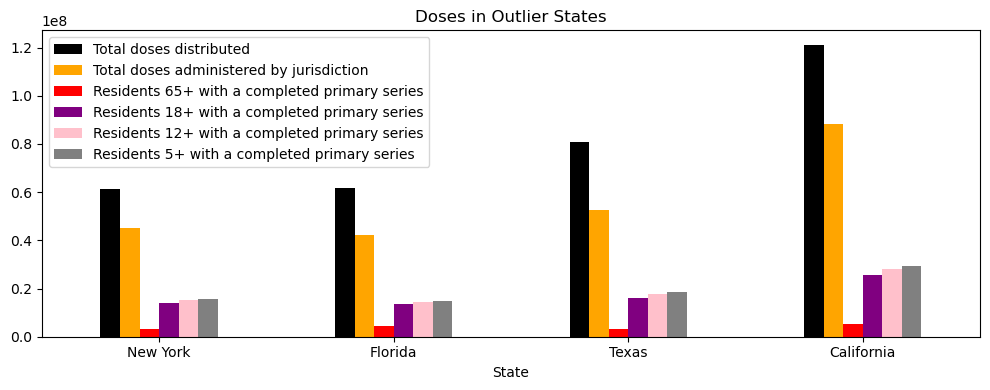

In [37]:
ax = XL_state_rows.plot(kind='bar', figsize=(10,4), x='State', y=['Total doses distributed', 
                                                                  'Total doses administered by jurisdiction',
                                                                 'Residents 65+ with a completed primary series', 
                                                                 'Residents 18+ with a completed primary series', 
                                                                 'Residents 12+ with a completed primary series', 
                                                                 'Residents 5+ with a completed primary series'], 
                                                                 rot=0, color=['black', 'orange', 'red','purple', 'pink', "gray"])
plt.title("Doses in Outlier States")
# plt.ylabel()
plt.tight_layout()

* TOP 75% of USA population Dataframe [upper quartile] - outliers states excluded

In [38]:

#largest states only population < 19,677,151 & > 6944739 [threshold for upper quartile] TOP 75% of USA population -->>>(with XL removed)
large_st_rows = merge_all_df.loc[(merge_all_df["2022 Population Estimate"] < 19677151) & (merge_all_df["2022 Population Estimate"] > 6944739)]
large_st_rows

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
6,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
9,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0
12,Michigan,10034113,Midwest,29638290,18769116,6979192,69.9,5615530,1756102,1615024,...,6921128,6221234,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,37102.0,412252.0,18475.0
15,Ohio,11756058,Midwest,31703485,21104771,7707458,65.9,6367505,1939194,1834185,...,7639577,7048249,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,49729.0,517794.0,24089.0
21,Georgia,10912876,South,28727475,17124791,7287758,68.6,5494615,1494072,1315992,...,7248684,6085428,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,36499.0,384074.0,18689.0
28,North Carolina,10698973,South,30278310,19434544,9456334,90.2,6316324,2366178,1811611,...,9392711,6987602,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,34383.0,417304.0,18048.0
33,Tennessee,7051339,South,17172490,11323319,4413541,64.6,3528315,1082135,992506,...,4391102,3843432,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,30408.0,330056.0,15597.0
35,Virginia,8683619,South,26823665,19608172,7794449,91.3,5701220,1565047,1329147,...,7712390,6507230,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,23148.0,301033.0,9805.0


In [100]:
large_st_rows["State"].unique()

array(['Massachusetts', 'New Jersey', 'Pennsylvania', 'Illinois',
       'Michigan', 'Ohio', 'Georgia', 'North Carolina', 'Tennessee',
       'Virginia', 'Arizona', 'Washington'], dtype=object)

In [96]:
#largest states
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(large_st_rows["2022 Population Estimate"],ddof = 0) # dof degrees of freedom
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(large_st_rows["2022 Population Estimate"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 4215283147536.139
The population standard deviation using the NumPy module is 2053115.4735026814


* Write TOP 75% of USA population Dataframe to csv file

In [39]:
large_st_rows.to_csv("../data/large_state_rows.csv", index = False)

* Histogram of TOP 75% of USA population 

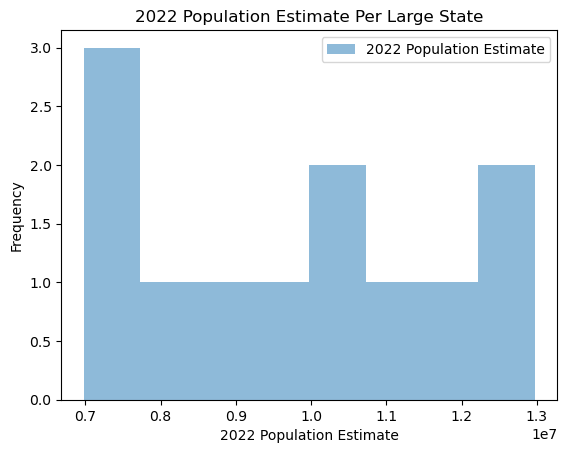

In [104]:
#Large states histogram
large_st_rows['2022 Population Estimate'].plot(kind='hist', bins = 8, alpha=0.5, legend=True)
plt.title('2022 Population Estimate Per Large State')
plt.xlabel('2022 Population Estimate')
# plt.ylabel('2022 Population Estimate')
plt.show()

* 50% of USA population Dataframe [interquartile] - outliers states excluded

In [41]:
#medium states only population < 6944739 & > 1816125 [interquartile]  50% of USA population -->>>(with XL removed)
medium_st_rows = merge_all_df.loc[(merge_all_df["2022 Population Estimate"] < 6944739) & (merge_all_df["2022 Population Estimate"] > 1816125)]
medium_st_rows

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
10,Indiana,6833037,Midwest,18989660,11201087,4350210,64.6,3511518,1046568,976073,...,4321434,3886503,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,26885.0,282262.0,13954.0
11,Iowa,3200517,Midwest,9429185,6131087,2235485,70.9,1818244,564406,532779,...,2215662,2024863,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,11026.0,125759.0,4065.0
13,Minnesota,5717184,Midwest,18519240,12829141,4461994,79.1,3533102,975356,919278,...,4390824,4039371,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,15298.0,188637.0,5610.0
14,Missouri,6177957,Midwest,15654225,10509024,4269469,69.6,3276112,1058140,943084,...,4236460,3615520,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,23363.0,273827.0,11052.0
16,Wisconsin,5892539,Midwest,16474175,12444016,4386970,75.3,3539130,1081267,1008957,...,4341550,3954892,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,17064.0,223540.0,6022.0
17,Alabama,5074296,South,12349530,7018011,3193141,65.1,2416344,840073,725159,...,3183544,2607644,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21520.0,231602.0,7411.0
18,Arkansas,3045637,South,8373210,4874091,2115165,70.1,1547724,524198,440981,...,2104099,1715538,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12663.0,140174.0,6060.0
22,Kansas,2937150,South,8356725,5387922,2229631,76.5,1688660,513572,462691,...,2209027,1898540,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,10152.0,112874.0,4487.0
23,Kentucky,4512310,South,12200975,7510137,3086324,69.1,2420948,750781,671775,...,3069983,2661099,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,20274.0,209080.0,10272.0


In [101]:
medium_st_rows["State"].unique()

array(['Connecticut', 'Indiana', 'Iowa', 'Minnesota', 'Missouri',
       'Wisconsin', 'Alabama', 'Arkansas', 'Kansas', 'Kentucky',
       'Louisiana', 'Maryland', 'Mississippi', 'Nebraska', 'Oklahoma',
       'South Carolina', 'Colorado', 'Idaho', 'Nevada', 'New Mexico',
       'Oregon', 'Utah'], dtype=object)

* Write 50% USA population data frame to csv file

In [42]:
medium_st_rows.to_csv("../data/medium_state_rows.csv", index = False)

* Histogram of 50% of USA population 

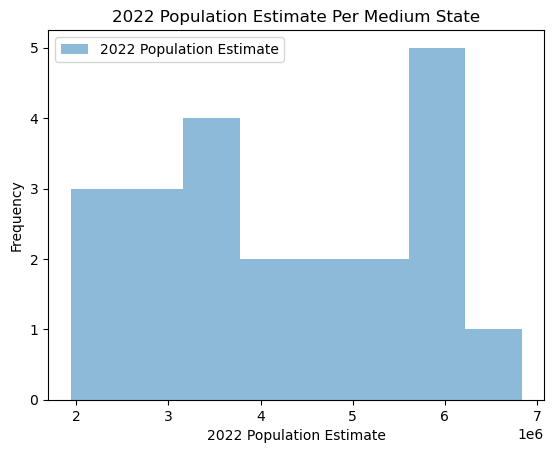

In [110]:

#medium states histogram
medium_st_rows['2022 Population Estimate'].plot(kind='hist', bins=8, alpha=0.5, legend=True)
plt.title('2022 Population Estimate Per Medium State')
plt.xlabel('2022 Population Estimate')
# plt.ylabel('2022 Population Estimate')
plt.show()

In [122]:
#medium states
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(medium_st_rows["2022 Population Estimate"],ddof = 0) # dof degrees of freedom
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(medium_st_rows["2022 Population Estimate"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 2126604782650.217
The population standard deviation using the NumPy module is 1458288.3057373178


* Lower 25% of USA population Dataframe [Lower quartile] - outliers states excluded

In [44]:
#small states only population < 1816125 [lower quartile]  lower 25% of USA population -->>>(with XL removed)
small_st_rows = merge_all_df.loc[merge_all_df["2022 Population Estimate"] < 1816125]
small_st_rows

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
7,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
8,Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0
19,Delaware,1018396,South,3352025,2169125,861811,88.5,641112,225182,193640,...,856096,713143,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3445.0,41037.0,1683.0
29,North Dakota,779261,South,1910860,1314469,530640,69.6,403968,127584,110011,...,524966,446460,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3101.0,29913.0,1621.0
32,South Dakota,909824,South,2713025,1688981,746118,84.3,524003,197409,159605,...,739933,586667,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3472.0,34467.0,1592.0
36,West Virginia,1775156,South,5515855,3098571,1212338,67.6,989169,354072,321971,...,1208323,1069264,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,8339.0,98692.0,4281.0
37,Alaska,733583,West,2176065,1328221,535718,73.2,418608,90909,81999,...,530318,474707,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,1492.0,20039.0,813.0
41,Hawaii,1440196,West,4677910,3530357,1297884,91.7,1010380,281382,258069,...,1285596,1150133,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,1943.0,47252.0,977.0


In [103]:
small_st_rows["State"].unique()

array(['Maine', 'New Hampshire', 'Rhode Island', 'Vermont', 'Delaware',
       'North Dakota', 'South Dakota', 'West Virginia', 'Alaska',
       'Hawaii', 'Montana', 'Wyoming'], dtype=object)

* Write Lower 25% of USA population Dataframe to csv file

In [45]:
small_st_rows.to_csv("../data/small_state_rows.csv", index = False)

* Histogram Lower 25% of USA population Dataframe 

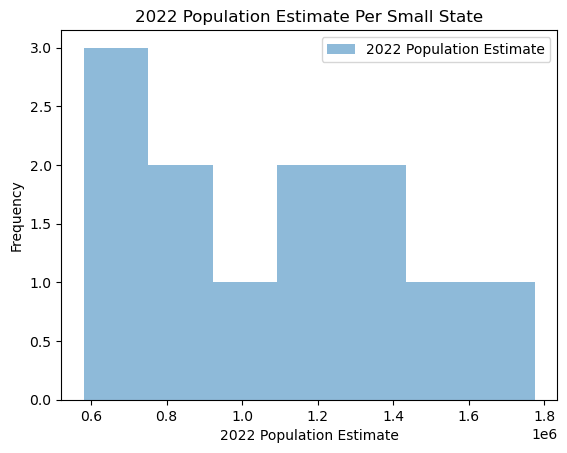

In [108]:
#small states histogram
small_st_rows['2022 Population Estimate'].plot(kind='hist', bins=7, alpha=0.5, legend=True)
plt.title('2022 Population Estimate Per Small State')
plt.xlabel('2022 Population Estimate')
# plt.ylabel('2022 Population Estimate')
plt.show()

In [123]:
#small states
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(small_st_rows["2022 Population Estimate"],ddof = 0) # dof degrees of freedom
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(small_st_rows["2022 Population Estimate"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 123863654010.52083
The population standard deviation using the NumPy module is 351942.6856897595


In [113]:
XL_total_pop = XL_state_rows["2022 Population Estimate"].sum()
Large_total_pop = large_st_rows["2022 Population Estimate"].sum()
Medium_total_pop = medium_st_rows["2022 Population Estimate"].sum()
Small_total_pop = small_st_rows["2022 Population Estimate"].sum()

In [121]:
per_XL_pop = (XL_total_pop/total_pop)*100
format_per_XL = format(per_XL_pop, '.0f')
print(f"Outlier states total population is {format_per_XL}% of the United States total population")

per_L_pop = (Large_total_pop/total_pop)*100
format_per_L = format(per_L_pop, '.0f')
print(f"Large states total population is {format_per_L}% of the United States total population")

per_M_pop = (Medium_total_pop/total_pop)*100
format_per_M = format(per_M_pop, '.0f')
print(f"Medium states total population is {format_per_M}% of the United States total population")

per_S_pop = (Small_total_pop/total_pop)*100
format_per_S = format(per_S_pop, '.0f')
print(f"Small states total population is {format_per_S}% of the United States total population")


Outlier states total population is 33% of the United States total population
Large states total population is 35% of the United States total population
Medium states total population is 28% of the United States total population
Small states total population is 4% of the United States total population


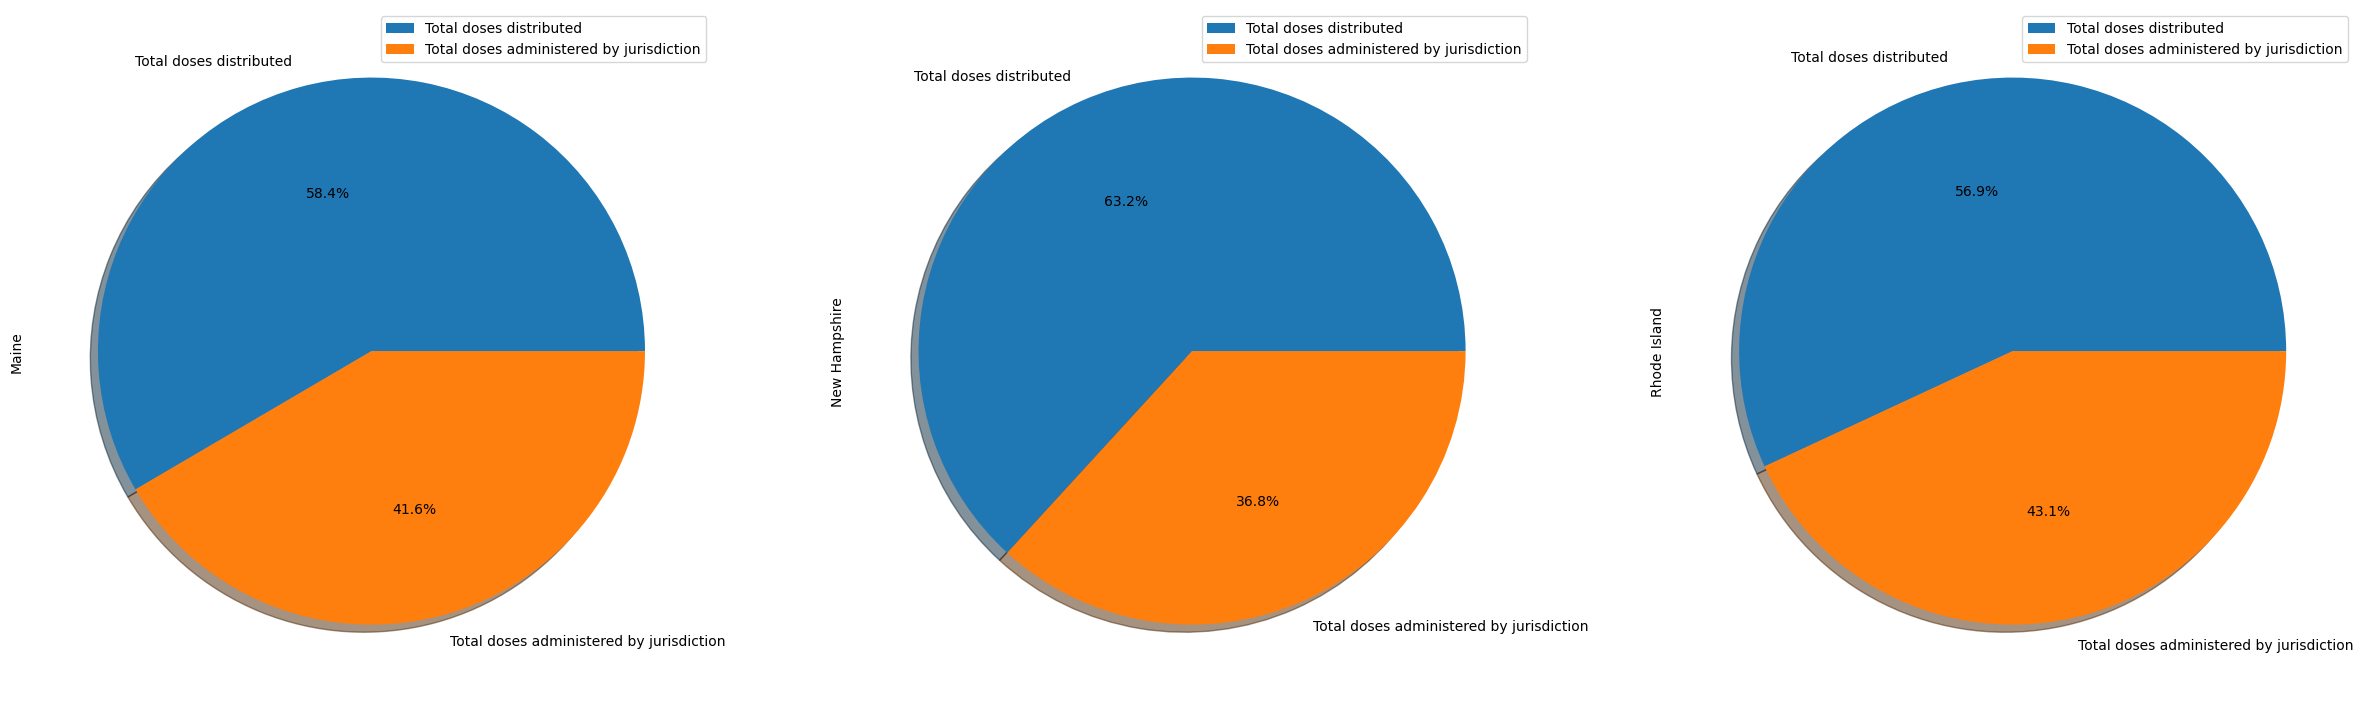

In [47]:
# transpose df small
small_137= pd.DataFrame({'Total doses distributed':[4981040,5121800,3531485],
                    'Total doses administered by jurisdiction':[3542346,2983122,2672092]},
                    index=['Maine','New Hampshire','Rhode Island'])
# Small state pie charts
small_137_pie= small_137.T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(30,15),shadow=True,)

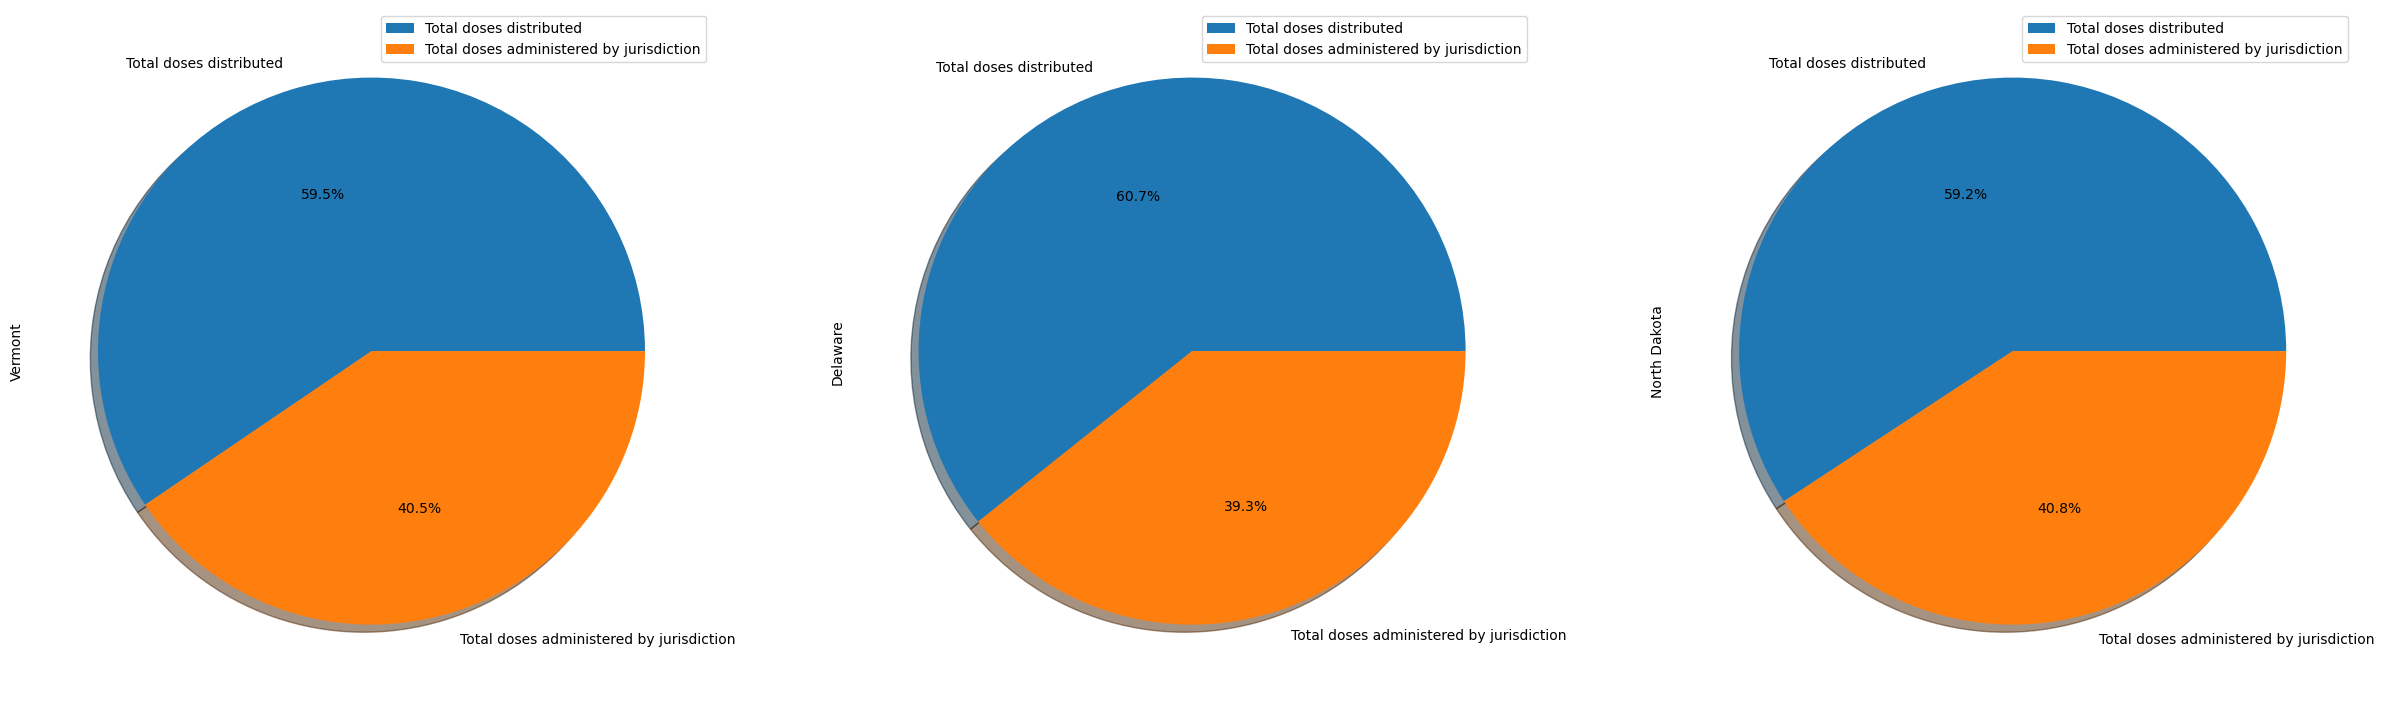

In [48]:

# transpose df small
small_8_19_29= pd.DataFrame({'Total doses distributed':[2588940,3352025,1910860],
                    'Total doses administered by jurisdiction':[1762563,2169125,1314469]},
                    index=['Vermont','Delaware','North Dakota'])
# Small state pie charts
small_8_19_29_pie= small_8_19_29.T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(30,15),shadow=True,)


In [49]:
# small_st_rows.set_index('State', inplace=True)

array([<Axes: ylabel='1'>], dtype=object)

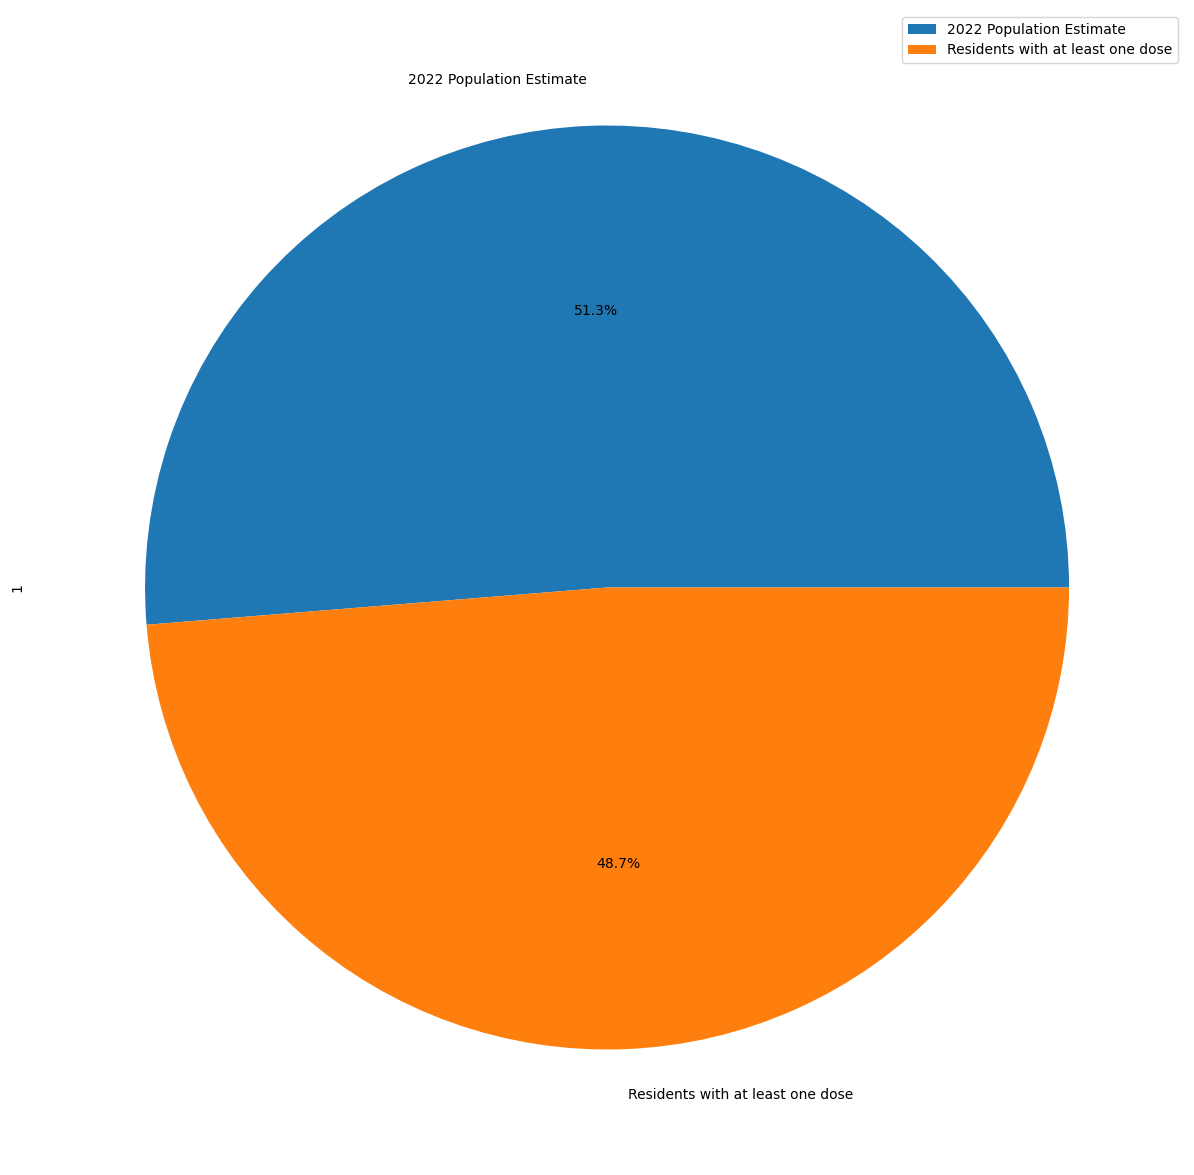

In [50]:
maine_pie4 = small_st_rows[['2022 Population Estimate', 'Residents with at least one dose']]
smallpie3filteredrow_df = maine_pie4.iloc[0]
smallpie3filteredrow_df.T.plot.pie(subplots=True, legend = True, figsize=(30,15), autopct='%1.1f%%')

array([<Axes: ylabel='1'>], dtype=object)

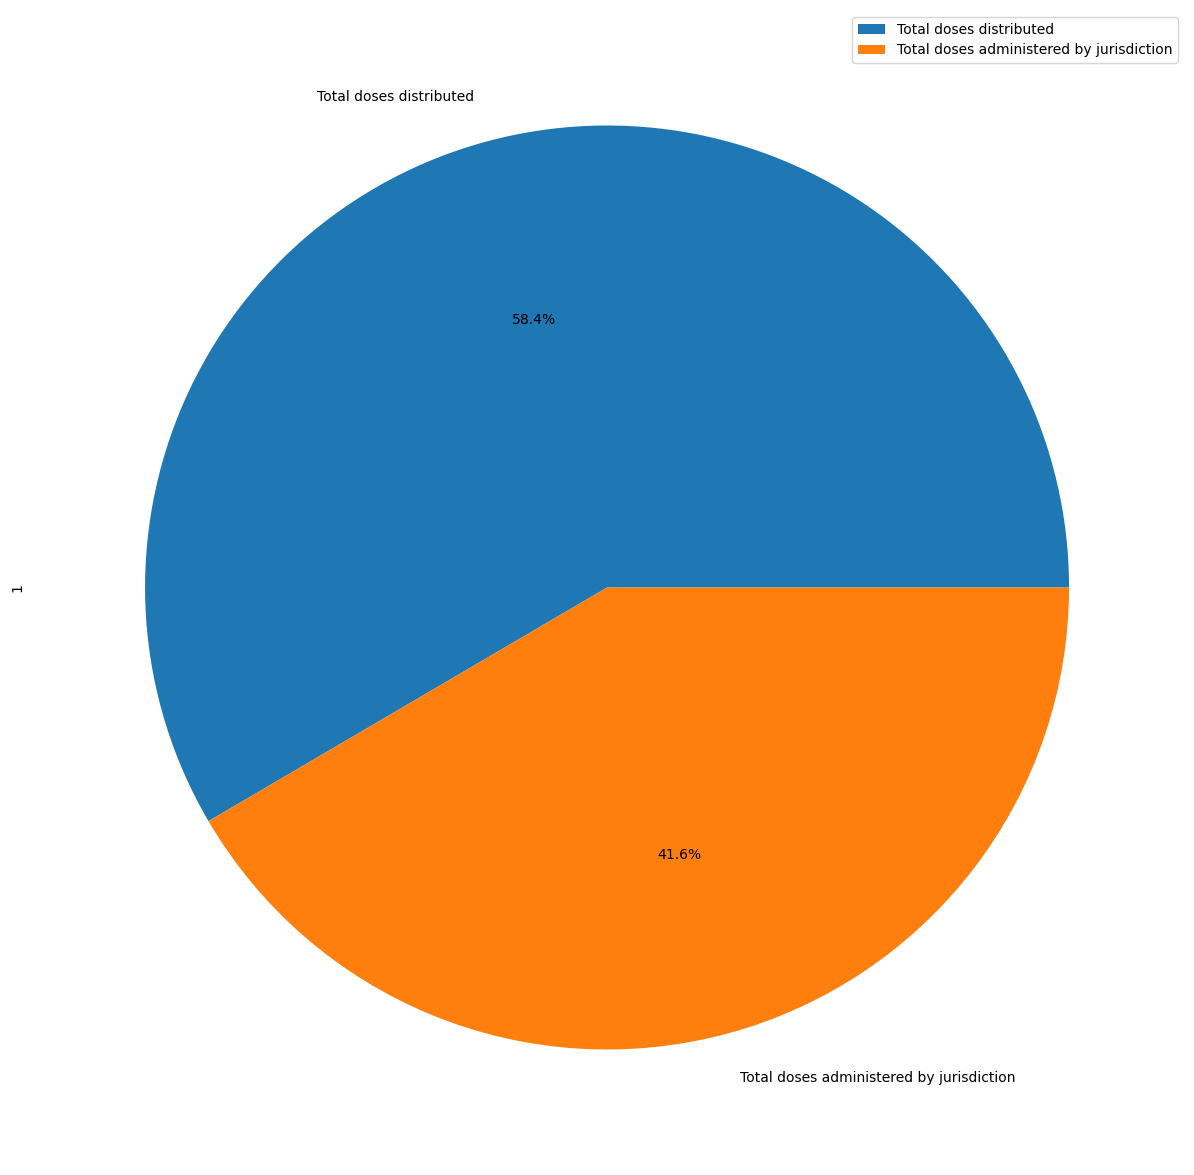

In [51]:
# small_st_rows.set_index('State', inplace=True)
maine_pie3 = small_st_rows[['Total doses distributed', 'Total doses administered by jurisdiction']]
smallpie3filteredrow_df = maine_pie3.iloc[0]
smallpie3filteredrow_df.T.plot.pie(subplots=True, legend = True, figsize=(30,15), autopct='%1.1f%%')

array([<Axes: ylabel='32'>, <Axes: ylabel='36'>, <Axes: ylabel='37'>],
      dtype=object)

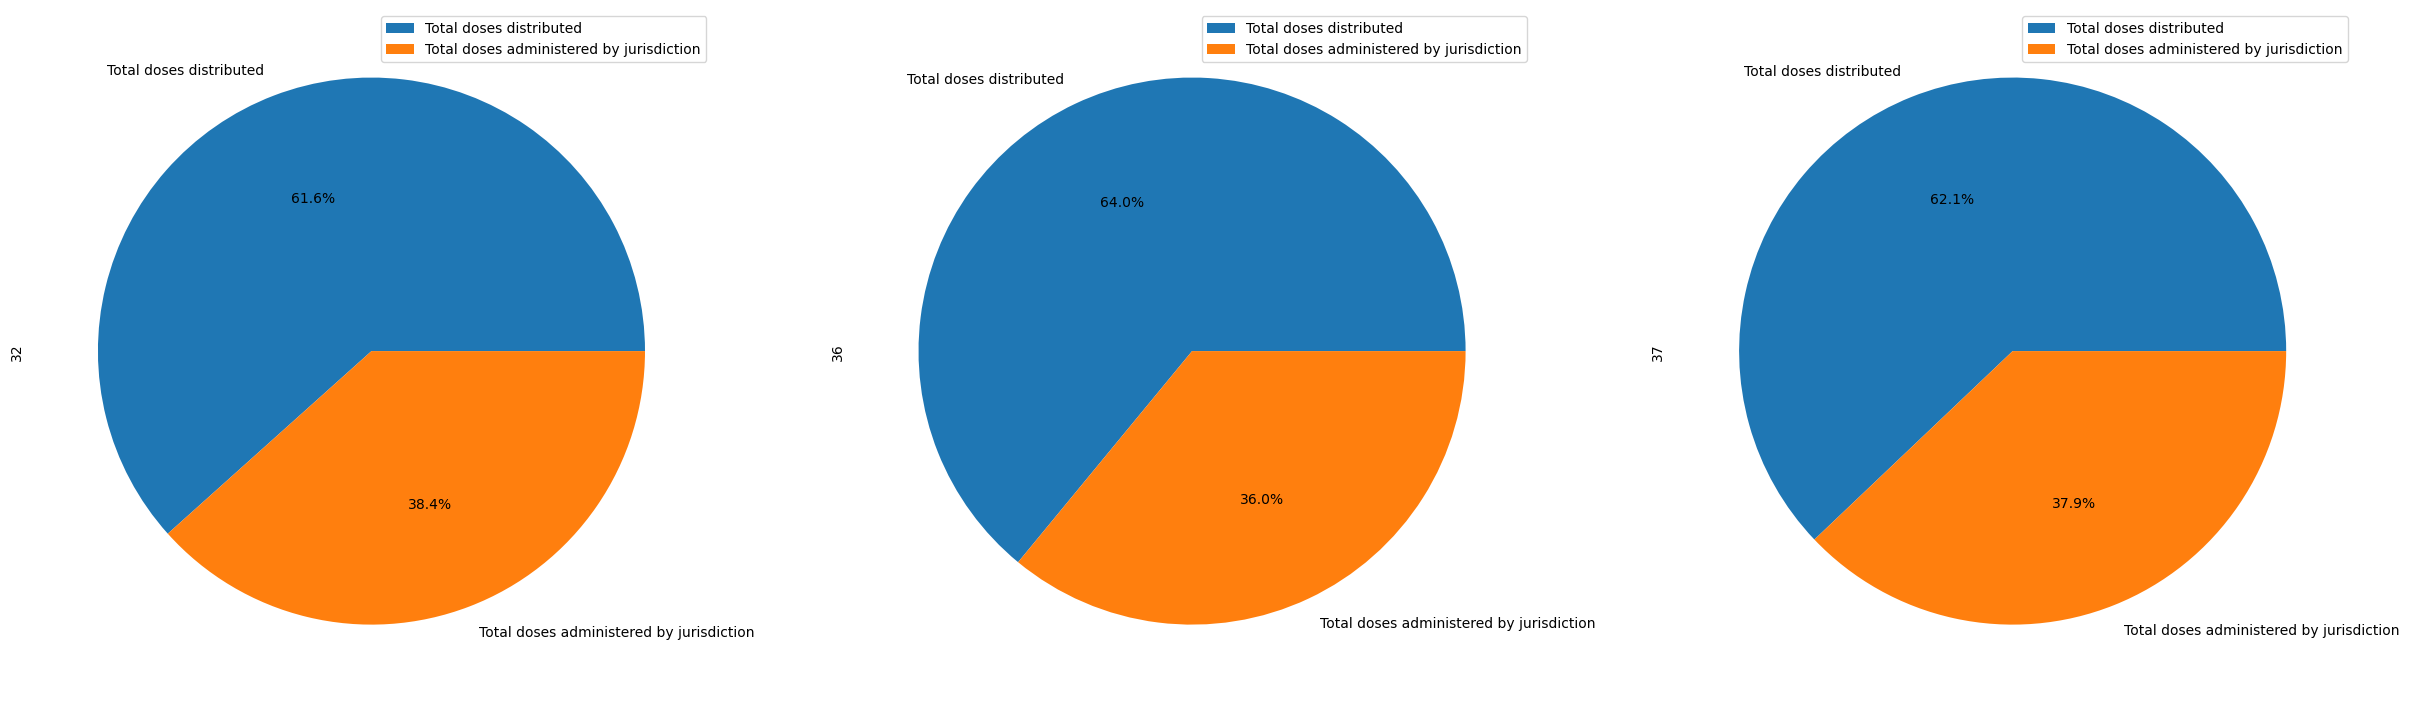

In [52]:
# small_st_rows.set_index('State', inplace=True)
small_pie3 = small_st_rows[['Total doses distributed', 'Total doses administered by jurisdiction']]
smallpie3filteredrow_df = small_pie3.iloc[6:9]
smallpie3filteredrow_df.T.plot.pie(subplots=True, figsize=(30,15), autopct='%1.1f%%')

array([<Axes: ylabel='41'>, <Axes: ylabel='43'>, <Axes: ylabel='49'>],
      dtype=object)

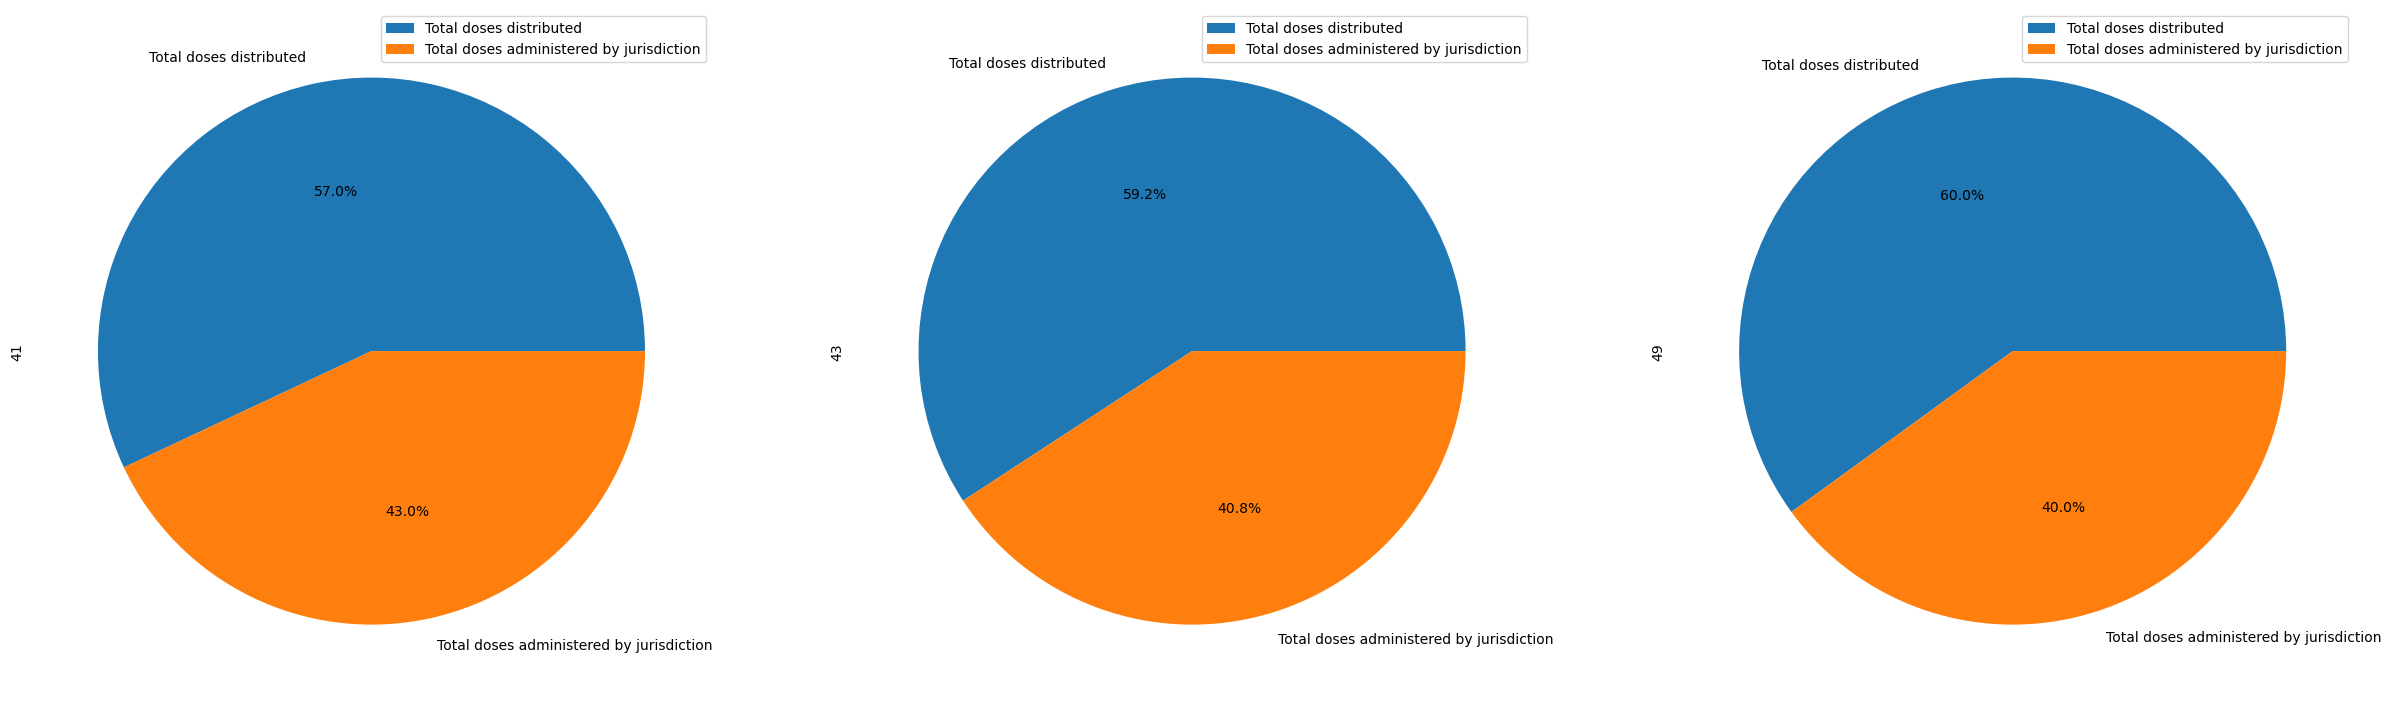

In [53]:
small_pie3 = small_st_rows[['Total doses distributed', 'Total doses administered by jurisdiction']]
smallpie3filteredrow_df = small_pie3.iloc[9:13]
smallpie3filteredrow_df.T.plot.pie(subplots=True, figsize=(30,15), autopct='%1.1f%%')

#### Attempts to calculate quartiles in Regions

In [54]:
# Population - NorthEast quartile calculations - NO OUTLIERS
# NE_pop = northeast_df["2022 Population Estimate"] 
# quartiles = NE_pop.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of NorthEast is: {lowerq}")
# print(f"The upper quartile of NorthEast is: {upperq}")
# print(f"The interquartile range of NorthEast is: {iqr}")
# print(f"The the median of NorthEast is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")
# outliers = NE_pop[(NE_pop>upper_bound) | (NE_pop<lower_bound)]

# if len(outliers) > 0:
#     print(f"NorthEast's potential outliers:{outliers}")

In [55]:
# Population - MidWest quartile calculations - NO OUTLIERS
# MW_pop = midwest_df["2022 Population Estimate"] 
# quartiles = NE_pop.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of MidWest is: {lowerq}")
# print(f"The upper quartile of MidWest is: {upperq}")
# print(f"The interquartile range of MidWest is: {iqr}")
# print(f"The the median of MidWest is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")
# outliers = MW_pop[(MW_pop>upper_bound) | (MW_pop<lower_bound)]
# if len(outliers) > 0:
    # print(f"MidWest's potential outliers:{outliers}")

In [56]:
# Population - West quartile calculations - 1 OUTLIERS - California
# W_pop = west_df["2022 Population Estimate"] 
# quartiles = W_pop.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of West is: {lowerq}")
# print(f"The upper quartile of West is: {upperq}")
# print(f"The interquartile range of West is: {iqr}")
# print(f"The the median of West is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")
# outliers = W_pop[(W_pop>upper_bound) | (W_pop<lower_bound)]
# if len(outliers) > 0:
#     print(f"West's potential outliers:{outliers}")

In [57]:
# Population - South quartile calculations - 2 OUTLIERS, Florida and Texas
# S_pop = south_df["2022 Population Estimate"] 
# quartiles = S_pop.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of South is: {lowerq}")
# print(f"The upper quartile of South is: {upperq}")
# print(f"The interquartile range of South is: {iqr}")
# print(f"The the median of South is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")
# outliers = S_pop[(S_pop>upper_bound) | (S_pop<lower_bound)]
# if len(outliers) > 0:
#     print(f"South's potential outliers:{outliers}")

* Boxplot of doses distributed by region

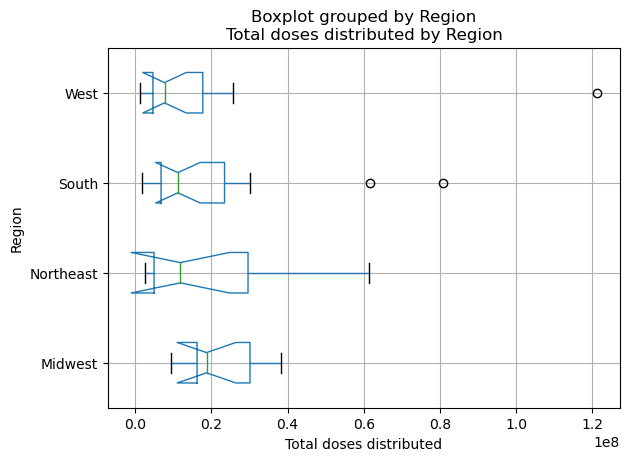

In [58]:
merge_all_df.boxplot(column='Total doses distributed', by='Region', notch=True, vert=False)
plt.title('Total doses distributed by Region')
plt.xlabel('Total doses distributed')
plt.ylabel('Region')
plt.show()

In [59]:
# # total doses distributed per region 'Northeast', 'Midwest', 'South', 'West'
# tot_dose = merge_all_df.groupby(['Region'])['Total doses distributed'].sum().reset_index()

# #plot bar graph
# tot_dose.plot(kind='bar', x='Region', y='Total doses distributed', legend=False)

# # Add labels and title
# plt.xlabel('Region')
# plt.ylabel('Total doses distributed')
# plt.title('Total doses distributed per Region')



* Doses administered by Region

Text(0.5, 1.0, 'Total doses administered by jurisdiction per Region')

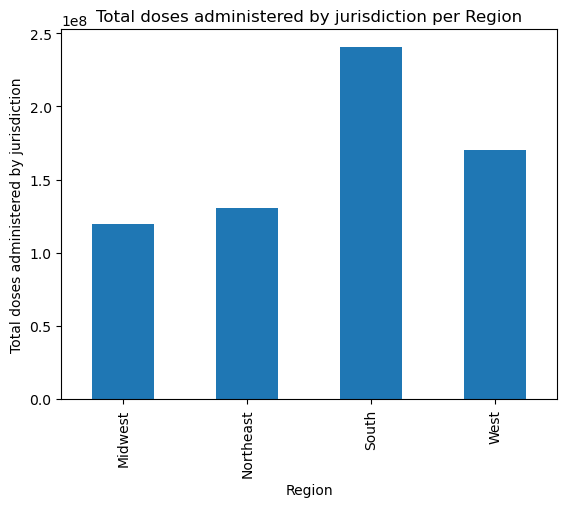

In [60]:
# total doses administered per region 'Northeast', 'Midwest', 'South', 'West'
tot_admin = merge_all_df.groupby(['Region'])['Total doses administered by jurisdiction'].sum().reset_index()

#plot bar graph
tot_admin.plot(kind='bar', x='Region', y='Total doses administered by jurisdiction', legend=False)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total doses administered by jurisdiction')
plt.title('Total doses administered by jurisdiction per Region')

* Histogram of population grouped by Region, including outlier states

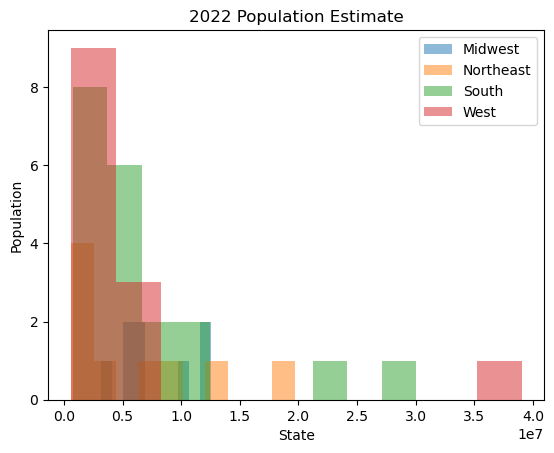

In [61]:
merge_all_df.groupby("Region")['2022 Population Estimate'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('2022 Population Estimate')
plt.xlabel('State')
plt.ylabel('Population')
plt.show()

* Plot Total doses distributed vs Total doses administered by jurisdiction from all states

The r-squared is: 0.993903061344987


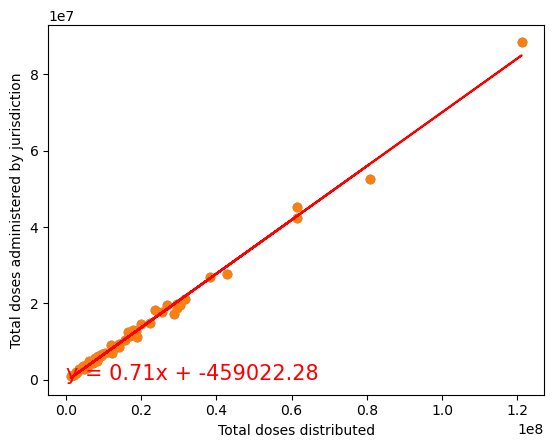

In [62]:
# Plot out Total doses distributed vs Total doses administered by jurisdiction
x_values = merge_all_df['Total doses distributed']
y_values = merge_all_df['Total doses administered by jurisdiction']
plt.scatter(x_values,y_values)
plt.xlabel('Total doses distributed')
plt.ylabel('Total doses administered by jurisdiction')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

#### T-tests - Hypothesis testing - All states - Population vs COVID-19 Deaths

In [124]:
# total us states
def gendata(loc1=0, loc2=0):
    population1 = merge_all_df["2022 Population Estimate"]
    population2 = merge_all_df["COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

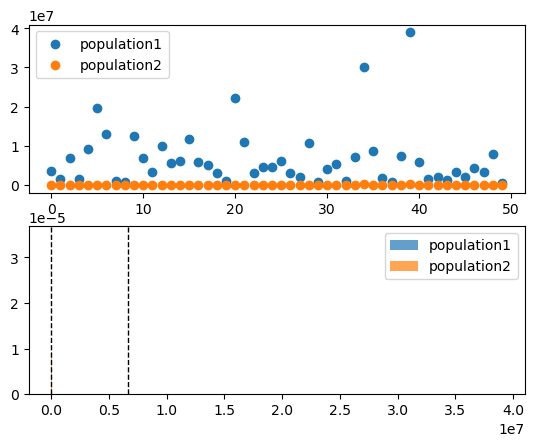

In [125]:
# Generate some data and show the scatter plot # total us states
population1, population2 = gendata()

In [126]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
# total us states
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=6.2913428026692815, pvalue=8.30782269361282e-08, df=49.001098778771855)

#### T-tests - Hypothesis testing - Outlier states - Population vs COVID-19 Deaths


In [127]:
# XL us states
def gendata(loc1=0, loc2=0):
    population1 = XL_state_rows["2022 Population Estimate"]
    population2 = XL_state_rows["COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

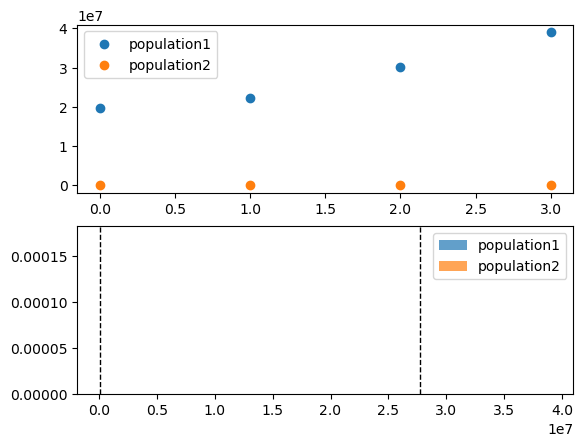

In [128]:
# Generate some data and show the scatter plot # total us states
population1, population2 = gendata()

In [129]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
# total us states
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=6.345038403942637, pvalue=0.007918219633692948, df=3.0000176797049503)

#### T-tests - Hypothesis testing - Top 75% states - Population vs COVID-19 Deaths


In [130]:
# Large us states
def gendata(loc1=0, loc2=0):
    population1 = large_st_rows["2022 Population Estimate"]
    population2 = large_st_rows["COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

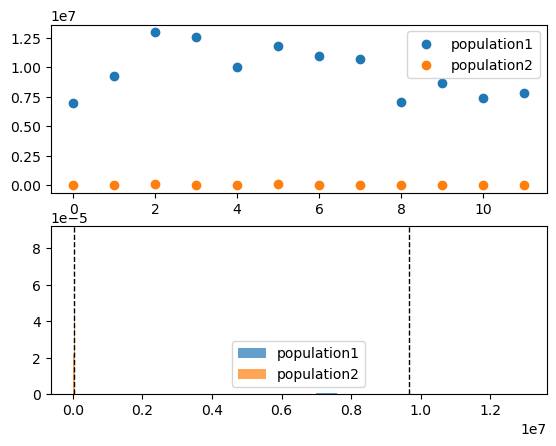

In [131]:
# Generate some data and show the scatter plot # total us states
population1, population2 = gendata()

In [132]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
# total us states
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=15.571585807521892, pvalue=7.678184897918796e-09, df=11.000571878284301)

#### T-tests - Hypothesis testing - 50% states - Population vs COVID-19 Deaths


In [133]:
# medium us states
def gendata(loc1=0, loc2=0):
    population1 = medium_st_rows["2022 Population Estimate"]
    population2 = medium_st_rows["COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

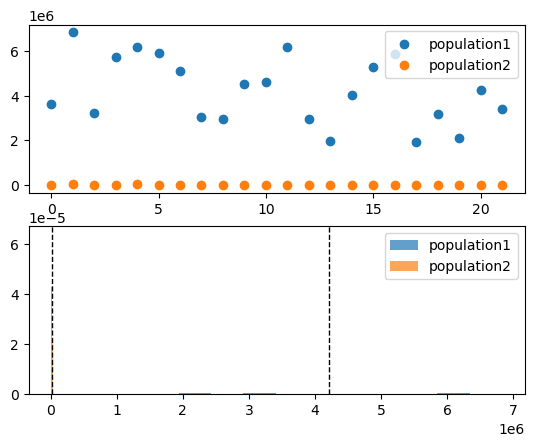

In [134]:
# Generate some data and show the scatter plot # total us states
population1, population2 = gendata()

In [135]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
# total us states
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=13.190842858104798, pvalue=1.2471943632101552e-11, df=21.000657203524447)

#### T-tests - Hypothesis testing - Lower 25% states - Population vs COVID-19 Deaths


In [136]:
# small us states
def gendata(loc1=0, loc2=0):
    population1 = small_st_rows["2022 Population Estimate"]
    population2 = small_st_rows["COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

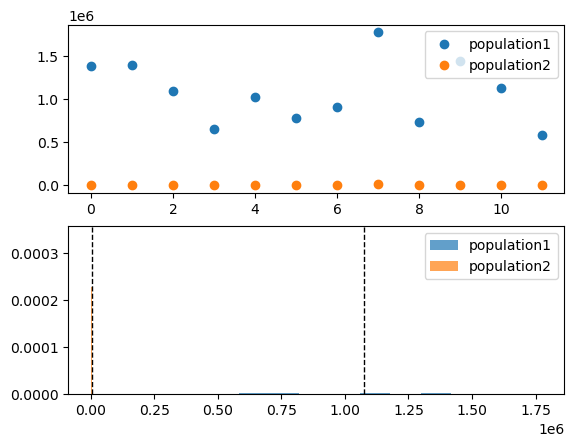

In [137]:
# Generate some data and show the scatter plot # total us states
population1, population2 = gendata()

In [138]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
# total us states
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=10.085665480331793, pvalue=6.785537424044183e-07, df=11.000579349510655)

#### T-tests - Hypothesis testing - All states - Residents with at least one dose vs COVID-19 Deaths

In [139]:
# total us states
def gendata(loc1=0, loc2=0):
    population1 = merge_all_df["Residents with at least one dose"]
    population2 = merge_all_df["COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

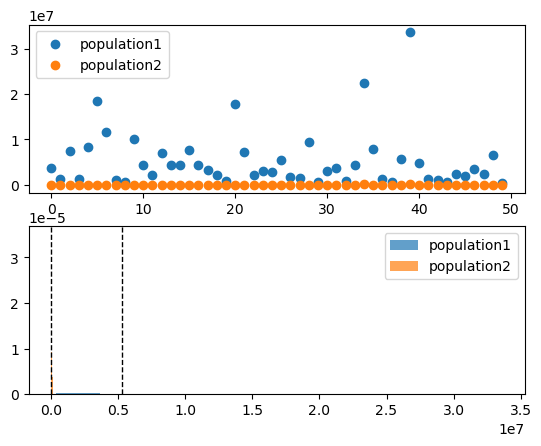

In [140]:
# Generate some data and show the scatter plot # total us states
population1, population2 = gendata()

In [141]:
# Run the t-test on the two population samples. # total us states
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=5.9776418070751856, pvalue=2.5332866530616385e-07, df=49.00156857304736)

#### T-tests - Hypothesis testing - Outlier states - Residents with at least one dose vs COVID-19 Deaths

In [142]:
# XL states
def gendata(loc1=0, loc2=0):
    population1 = XL_state_rows["Residents with at least one dose"]
    population2 = XL_state_rows["COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

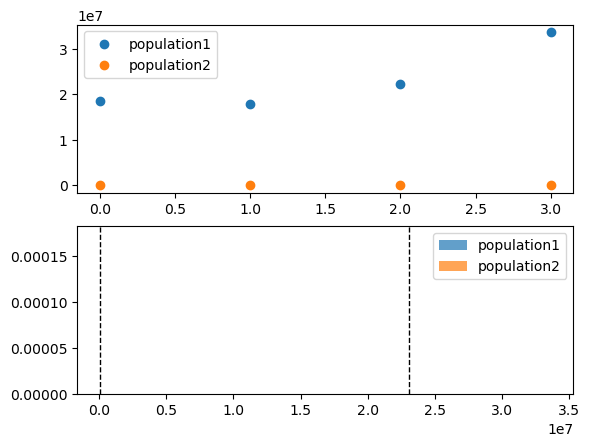

In [143]:
# Generate some data and show the scatter plot # XL states
population1, population2 = gendata()

In [144]:
# Run the t-test on the two population samples. # XL states
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=6.26673353859866, pvalue=0.008201470297977072, df=3.0000250363104377)

#### T-tests - Hypothesis testing - Top 75% states - Residents with at least one dose vs COVID-19 Deaths

In [145]:
# large states
def gendata(loc1=0, loc2=0):
    population1 = large_st_rows["Residents with at least one dose"]
    population2 = large_st_rows["COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

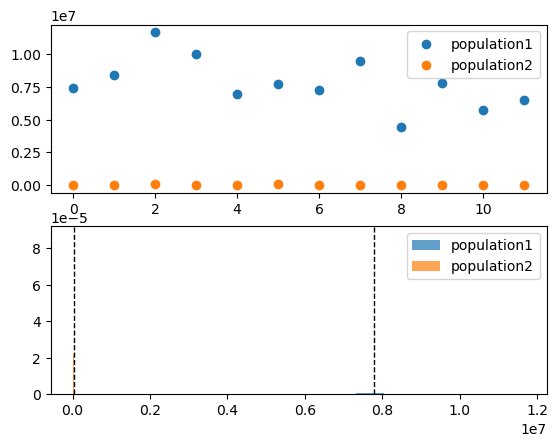

In [146]:
# Generate some data and show the scatter plot # large states
population1, population2 = gendata()

In [147]:
# Run the t-test on the two population samples. # large states
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=13.785041911645616, pvalue=2.761460556534477e-08, df=11.000693619517259)

#### T-tests - Hypothesis testing - 50% states - Residents with at least one dose vs COVID-19 Deaths

In [148]:
# medium states t-testing
def gendata(loc1=0, loc2=0):
    population1 = medium_st_rows["Residents with at least one dose"]
    population2 = medium_st_rows["COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

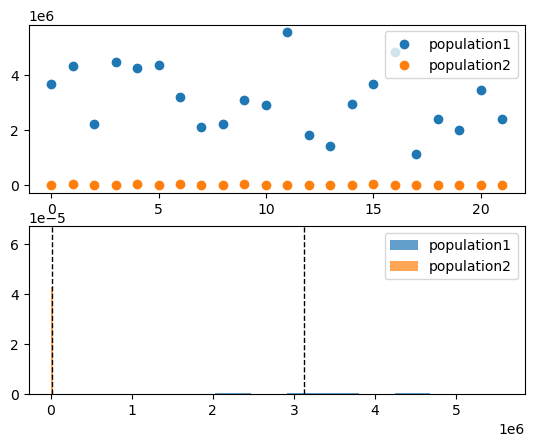

In [149]:
# Generate some data and show the scatter plot # medium states
population1, population2 = gendata()

In [150]:
# Run the t-test on the two population samples. # medium states
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=12.343154031556054, pvalue=4.3187172973947105e-11, df=21.001051673771578)

#### T-tests - Hypothesis testing - Lower 25% states - Residents with at least one dose vs COVID-19 Deaths

In [151]:
# small states t-testing
def gendata(loc1=0, loc2=0):
    population1 = small_st_rows["Residents with at least one dose"]
    population2 = small_st_rows["COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

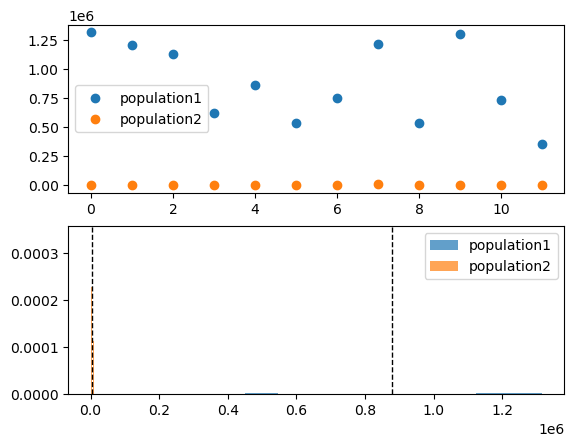

In [152]:
# Generate some data and show the scatter plot # small states
population1, population2 = gendata()

In [153]:
# Run the t-test on the two population samples. # small states
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=8.941401273132938, pvalue=2.233407020080434e-06, df=11.000681110858586)